In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anthony_wrangle

In [2]:
from anthony_wranglev2 import wrangle_credit
train, validate, test = wrangle_credit()
train

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,120-149,paid_off,no_debt,month_01,month_02,month_03,month_04,month_05,month_06,defaulted
22151,5142128,F,0,0,0,283500.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,...,0.0,0.0,6.0,X,X,X,X,X,X,False
21572,5136981,F,0,0,0,306000.0,State servant,Higher education,Married,House / apartment,...,0.0,2.0,0.0,0,0,1,1,C,C,False
8328,5052719,F,0,0,0,126000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0.0,6.0,0.0,C,C,C,C,C,C,False
19787,5117901,F,0,0,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0.0,6.0,0.0,C,C,C,C,C,C,False
12424,5069147,M,0,1,0,216000.0,Commercial associate,Higher education,Married,House / apartment,...,0.0,1.0,4.0,0,X,X,X,X,C,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,5010277,M,0,1,1,562500.0,Working,Incomplete higher,Married,House / apartment,...,0.0,6.0,0.0,C,C,C,C,C,C,False
7609,5048072,F,0,1,0,193500.0,Working,Higher education,Single / not married,House / apartment,...,0.0,0.0,0.0,0,0,0,0,0,0,False
12342,5068964,M,1,0,0,202500.0,Working,Higher education,Married,House / apartment,...,0.0,6.0,0.0,C,C,C,C,C,C,False
4530,5033495,F,0,1,3,126000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.0,0.0,0.0,0,0,0,0,0,0,False


In [3]:
train.defaulted.value_counts()

False    17568
True        65
Name: defaulted, dtype: int64

In [4]:
base = 1 - (65/17568)
{f'Baseline is {base}'}

{'Baseline is 0.9963000910746812'}

# Looking at the relationship between our target variable and a few of the app categorical features

In [5]:
pd.crosstab(train.defaulted, train.name_family_status, margins=True)


name_family_status,Civil marriage,Married,Separated,Single / not married,Widow,All
defaulted,,,,,,
False,1398,12282,1071,2150,667,17568
True,3,47,4,9,2,65
All,1401,12329,1075,2159,669,17633


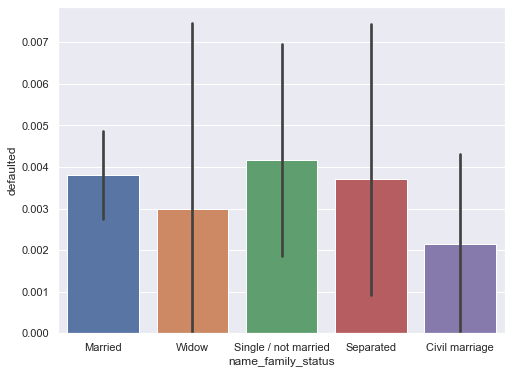

In [17]:
sns.barplot(x="name_family_status", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})

In [6]:
pd.crosstab(train.defaulted, train.name_housing_type, margins=True)


name_housing_type,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,All
defaulted,,,,,,,
False,83,15683,566,115,252,869,17568
True,1,61,1,0,2,0,65
All,84,15744,567,115,254,869,17633


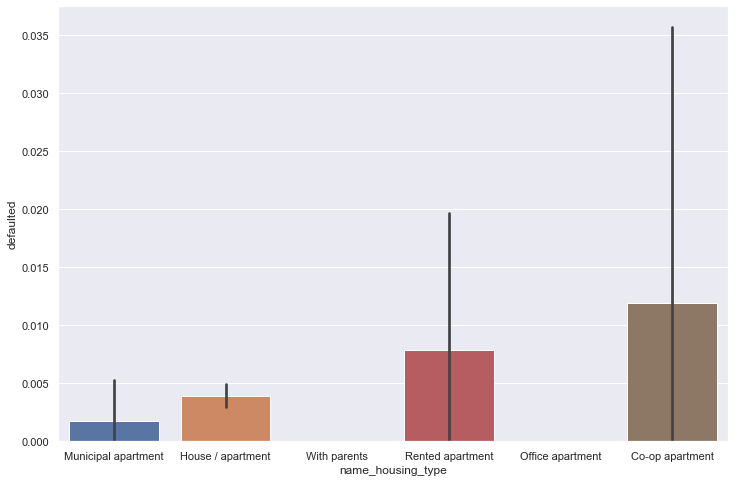

In [22]:
sns.barplot(x="name_housing_type", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(14,8)})

In [7]:
pd.crosstab(train.defaulted, train.name_education_type, margins=True)


name_education_type,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,All
defaulted,,,,,,
False,22,4842,719,198,11787,17568
True,0,20,4,0,41,65
All,22,4862,723,198,11828,17633


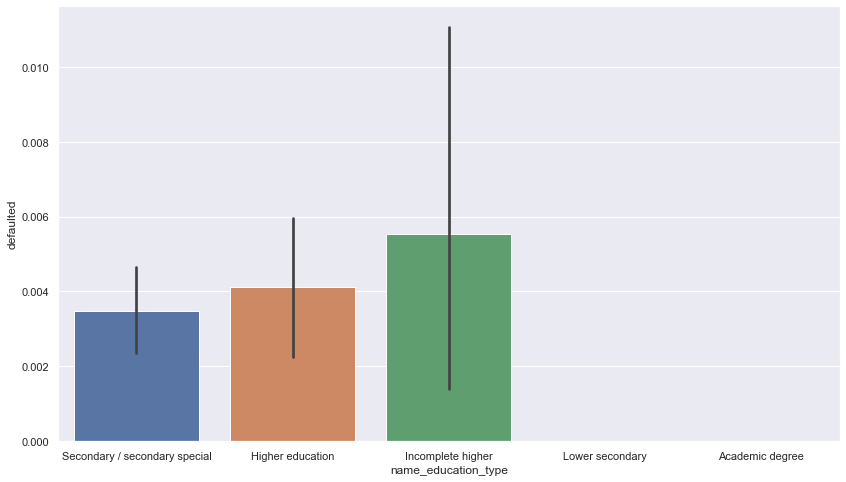

In [23]:
sns.barplot(x="name_education_type", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})

In [8]:
pd.crosstab(train.defaulted, train.name_income_type, margins=True)


name_income_type,Commercial associate,Pensioner,State servant,Student,Working,All
defaulted,,,,,,
False,4186,2833,1525,8,9016,17568
True,20,12,5,0,28,65
All,4206,2845,1530,8,9044,17633


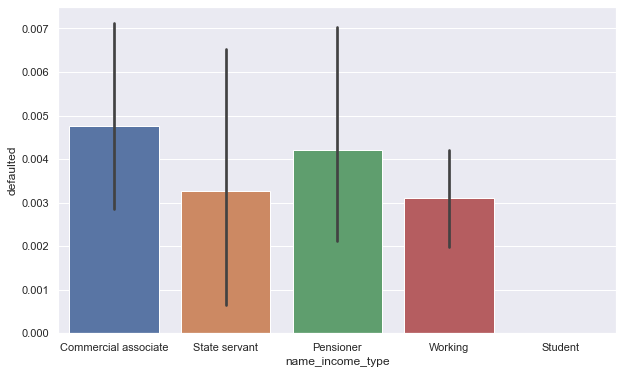

In [16]:
sns.barplot(x="name_income_type", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})


In [25]:
pd.crosstab(train.defaulted, train.code_gender, margins=True)


code_gender,F,M,All
defaulted,,,
False,11690,5878,17568
True,40,25,65
All,11730,5903,17633


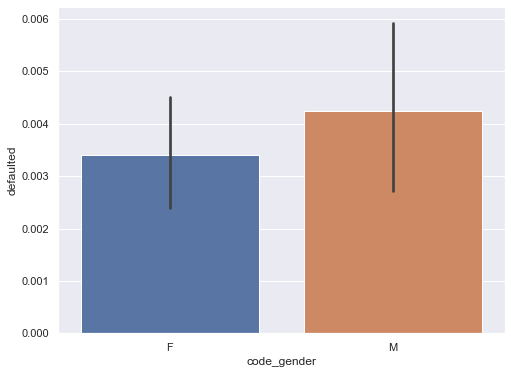

In [26]:
sns.barplot(x="code_gender", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})

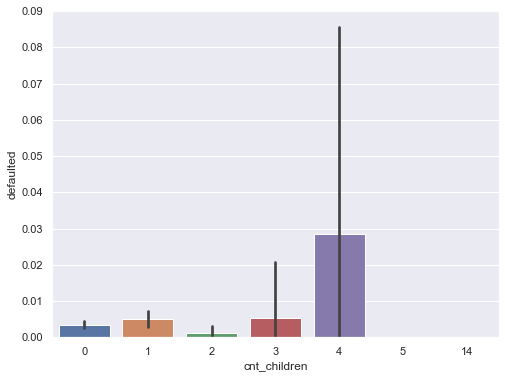

In [27]:
sns.barplot(x="cnt_children", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})

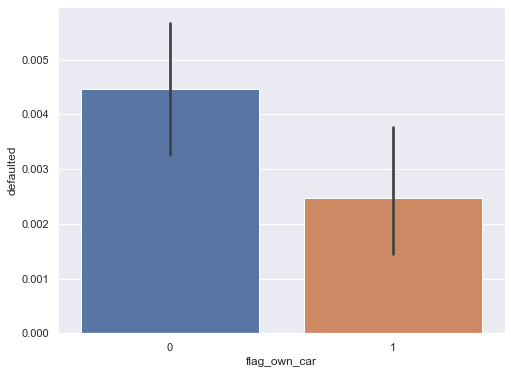

In [28]:
sns.barplot(x="flag_own_car", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})

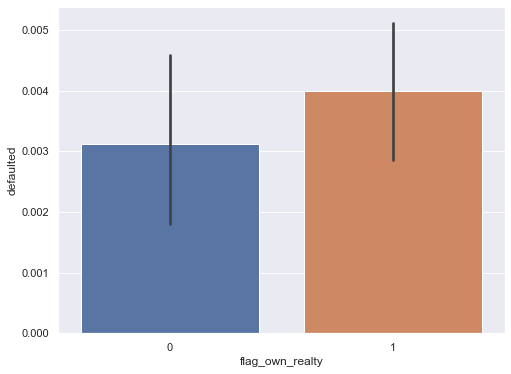

In [29]:
sns.barplot(x="flag_own_realty", y="defaulted", data=train)
sns.set(rc={'figure.figsize':(8,6)})